In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns
import pickle

sns.set_style("ticks")
hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
from matplotlib import colors
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn

In [2]:
from lmfit import Model
from lmfit.models import LinearModel

In [3]:
model_lm = LinearModel()

In [4]:
colorlist = ["windows blue", "faded green", "dusty purple"]
sns.set_palette = sns.xkcd_palette(colorlist)
cmap_all  = sns.xkcd_palette(colorlist)#colors.ListedColormap(sns.xkcd_palette(colorlist))

In [5]:
path = Path(os.getcwd()).parents[0]

modelpath = os.path.join(path, 'multireg')
hfn.dir_check(modelpath)

linpath = os.path.join(modelpath, 'lin_scale')
hfn.dir_check(linpath)

linpath_df = os.path.join(linpath, 'DF')

logpath = os.path.join(modelpath, 'log_scale')
hfn.dir_check(logpath)

logpath_df = os.path.join(logpath, 'DF')


In [6]:
fracpath = os.path.join(path, 'input_fraction')

fracpath_csv = os.path.join(fracpath, 'csv')

In [7]:
figpath = os.path.join(path, 'Figures')
hfn.dir_check(figpath)
    
figs41path = os.path.join(figpath, 'FigS11')
hfn.dir_check(figs41path)

figs41panelpaths = os.path.join(figs41path, 'panels')
hfn.dir_check(figs41panelpaths)

# Load data 

In [8]:
df_all = pd.read_hdf(os.path.join(modelpath, 'df_all.h5'))

In [9]:
list_r2_log_filt = pd.read_hdf(os.path.join(logpath_df, 'multireg_results_linear_allstarters.h5'))

In [10]:
list_r2_log_filt

,starter,target_frac,genotype,target_frac + genotype,starter + target_frac,starter + genotype,starter + target_frac + genotype
area,,,,,,,
LGd,0.213591,0.484107,0.069489,0.511588,0.669808,0.215091,0.672907
LP,0.077689,0.066052,0.109176,0.154084,0.137504,0.126536,0.173172
LD,0.428161,0.019730,0.138977,0.177318,0.457208,0.431115,0.463415
AM,0.016939,0.339539,0.059278,0.448589,0.350299,0.143238,0.543799
ORB,0.090342,0.257795,0.060578,0.288522,0.334936,0.102729,0.336784
ACA,0.344852,0.067432,0.000400,0.067732,0.399226,0.443396,0.521526
AUD,0.490000,0.000507,0.124945,0.125748,0.490088,0.490034,0.490140
PTLp,0.199442,0.015602,0.003017,0.017004,0.210401,0.236665,0.254297
TEa,0.620845,0.000483,0.128842,0.134331,0.624198,0.622311,0.625130


# plot data distributions

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


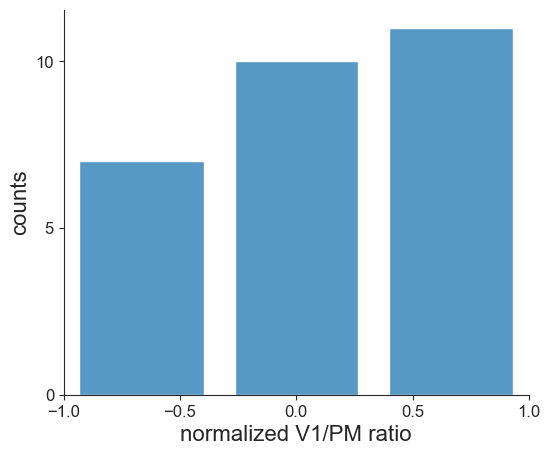

In [11]:
h = sns.histplot(df_all, x= 'norm_frac', bins = [-1,-0.33,0.33,1], shrink = 0.8)
plt.xlabel('normalized V1/PM ratio', fontsize = 16)
plt.ylabel('counts', fontsize = 16)
plt.tick_params(labelsize=12)
plt.xlim(-1,1)
plt.locator_params(nbins=4)
h.figure.set_figheight(5)
h.figure.set_figwidth(6)
# h.figure.set_size_inches(5.5,5, forward=True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig(os.path.join(figs41panelpaths, 'figS11a.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs41panelpaths, 'figS11a.eps'), bbox_inches = 'tight', format = 'eps', dpi =200)

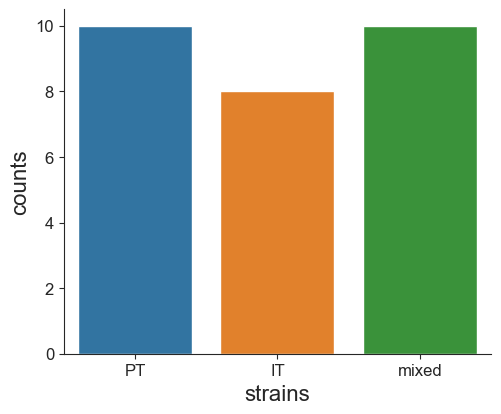

In [12]:

h=sns.catplot(data = df_all, x = 'cell_type',kind="count")
plt.ylabel('counts', fontsize = 16)
plt.xlabel('strains', fontsize = 16)
plt.tick_params(labelsize=12)
h.fig.set_figheight(4)
h.fig.set_figwidth(5)
# h.fig.set_size_inches(5.5,5, forward=True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig(os.path.join(figs41panelpaths, 'figS11b.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs41panelpaths, 'figS11b.eps'), bbox_inches = 'tight', format = 'eps', dpi =200)

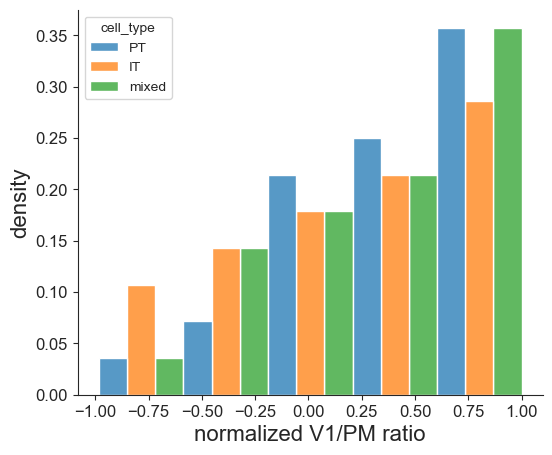

In [13]:
h = sns.histplot(data = df_all,  x="norm_frac", hue = 'cell_type',  multiple = 'dodge',cumulative=True,stat="density", bins = 5)
plt.tick_params(labelsize=12)
plt.ylabel('density', fontsize = 16)
plt.xlabel('normalized V1/PM ratio', fontsize = 16)
plt.tick_params(labelsize=12)
h.set_rasterized(True)
h.figure.set_figheight(5)
h.figure.set_figwidth(6)
# h.figure.set_size_inches(5.5,5, forward=True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig(os.path.join(figs41panelpaths, 'figS11c.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs41panelpaths, 'figS11c.eps'), bbox_inches = 'tight', format = 'eps', dpi =200)

In [14]:
f= plt.gcf()

<Figure size 640x480 with 0 Axes>

# plot regression analysis

In [15]:
# set dataframes for plotting

list_res1 = list_r2_log_filt[['starter', 'target_frac', 'starter + target_frac']]
list_res_cat1 = pd.DataFrame(list_res1.stack(),columns = ['r2'])
list_res_cat1.index = list_res_cat1.index.set_names(['area', 'feature'])
list_res_cat1.reset_index(inplace = True)
# list_res_cat1['column'] = 1


list_res2 = list_r2_log_filt[['starter', 'genotype', 'starter + genotype']]
list_res_cat2 = pd.DataFrame(list_res2.stack(),columns = ['r2'])
list_res_cat2.index = list_res_cat2.index.set_names(['area', 'feature'])
list_res_cat2.reset_index(inplace = True)
# list_res_cat2['column'] = 2

list_res3 = list_r2_log_filt[['starter',  'starter + target_frac + genotype']]
list_res_cat3 = pd.DataFrame(list_res3.stack(),columns = ['r2'])
list_res_cat3.index = list_res_cat3.index.set_names(['area', 'feature'])
list_res_cat3.reset_index(inplace = True)
# list_res_cat3['column'] = 3

# list_res_cat = pd.concat([list_res_cat1, list_res_cat2, list_res_cat3], axis = 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


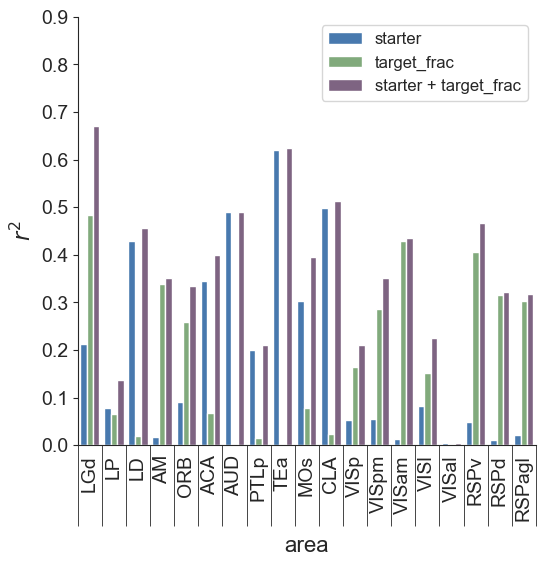

In [16]:

c = sns.catplot(data = list_res_cat1, y = 'r2', x = 'area', hue = 'feature', kind = 'bar', palette = cmap_all)#.index

c._legend.remove()
plt.xticks(rotation=90)
# list_res1.plot(kind='bar', ax = ax1, width = 1, cmap = cmap_all)
c.axes.flatten()[0].set_ylabel('$r^2$', fontsize = 16)
c.axes.flatten()[0].set_xlabel('area', fontsize = 16)
plt.legend(fontsize = 12)   
c.axes.flatten()[0].set_ylim(0,0.9)

plt.xticks(np.arange(len(list_res_cat1['area'].unique())), list_res_cat1['area'].unique(), rotation=90, ha="center")
c.axes.flatten()[0].xaxis.set_minor_locator(mtick.MultipleLocator(0.5))
c.axes.flatten()[0].tick_params(which='minor', length=58)

for tick in c.axes.flatten()[0].xaxis.get_major_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
    

for label in (c.axes.flatten()[0].get_yticklabels() + c.axes.flatten()[0].get_xticklabels()):
    label.set_fontsize(14)

c.fig.set_size_inches(7.5, 5)
plt.savefig(os.path.join(figs41panelpaths, 'figS11d_1.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs41panelpaths, 'figS11d_1.eps'), bbox_inches = 'tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


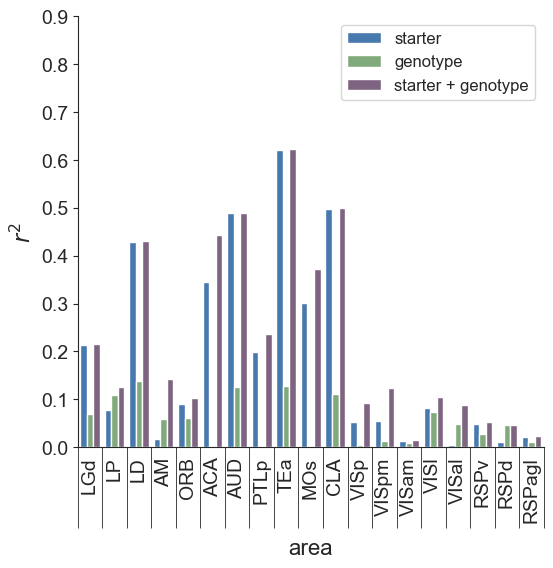

In [17]:

c = sns.catplot(data = list_res_cat2, y = 'r2', x = 'area', hue = 'feature', kind = 'bar', palette = cmap_all)#.index

c._legend.remove()
plt.xticks(rotation=90)
# list_res1.plot(kind='bar', ax = ax1, width = 1, cmap = cmap_all)
c.axes.flatten()[0].set_ylabel('$r^2$', fontsize = 16)
c.axes.flatten()[0].set_xlabel('area', fontsize = 16)
plt.legend(fontsize = 12)   
c.axes.flatten()[0].set_ylim(0,0.9)


plt.xticks(np.arange(len(list_res_cat2['area'].unique())), list_res_cat2['area'].unique(), rotation=90, ha="center")
c.axes.flatten()[0].xaxis.set_minor_locator(mtick.MultipleLocator(0.5))
c.axes.flatten()[0].tick_params(which='minor', length=58)

for tick in c.axes.flatten()[0].xaxis.get_major_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
    

for label in (c.axes.flatten()[0].get_yticklabels() + c.axes.flatten()[0].get_xticklabels()):
    label.set_fontsize(14)
    
c.fig.set_size_inches(7.5, 5)
plt.savefig(os.path.join(figs41panelpaths, 'figS11d_2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs41panelpaths, 'figS11d_2.eps'), bbox_inches = 'tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


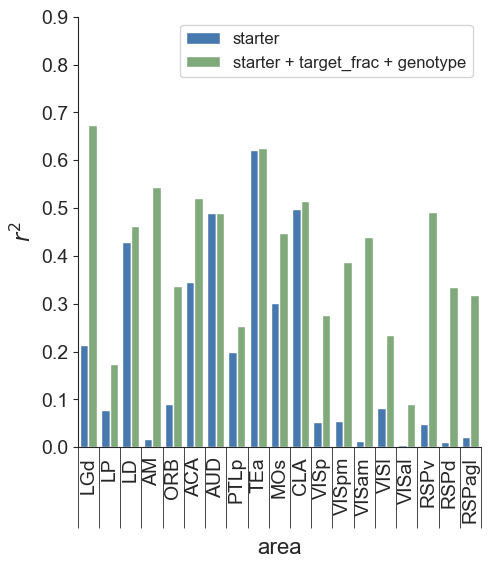

In [18]:

c = sns.catplot(data = list_res_cat3, y = 'r2', x = 'area', hue = 'feature', kind = 'bar', palette = cmap_all)#.index

c._legend.remove()
plt.xticks(rotation=90)
# list_res1.plot(kind='bar', ax = ax1, width = 1, cmap = cmap_all)
c.axes.flatten()[0].set_ylabel('$r^2$', fontsize = 16)
c.axes.flatten()[0].set_xlabel('area', fontsize = 16)
plt.legend(fontsize = 12)   
c.axes.flatten()[0].set_ylim(0,0.9)


plt.xticks(np.arange(len(list_res_cat3['area'].unique())), list_res_cat3['area'].unique(), rotation=90, ha="center")
c.axes.flatten()[0].xaxis.set_minor_locator(mtick.MultipleLocator(0.5))
c.axes.flatten()[0].tick_params(which='minor', length=58)

for tick in c.axes.flatten()[0].xaxis.get_major_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
    
for label in (c.axes.flatten()[0].get_yticklabels() + c.axes.flatten()[0].get_xticklabels()):
    label.set_fontsize(14)

c.fig.set_size_inches(7.5, 5)
    
plt.savefig(os.path.join(figs41panelpaths, 'figS11d_3.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs41panelpaths, 'figS11d_3.eps'), bbox_inches = 'tight', format = 'eps')